In [12]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Load the dataset

df1 = pd.read_excel('/content/drive/MyDrive/Entertainer Project/Entertainer - Basic Info.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Entertainer Project/Entertainer - Breakthrough Info.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Entertainer Project/Entertainer - Last work Info.xlsx')

# Print the column names to verify 'zip' exists in all dataframes
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)
print("Columns in df3:", df3.columns)

# Merge the dataframes sequentially, adjusting 'on' if necessary
inner_join1 = pd.merge(df1, df2, on='zip' if 'zip' in df1.columns and 'zip' in df2.columns else None, how='inner') # Merge df1 and df2 first, handle cases where 'zip' might not be in both
inner_join_final = pd.merge(inner_join1, df3, on='zip' if 'zip' in inner_join1.columns and 'zip' in df3.columns else None, how='inner') # Then merge the result with df3, handle cases where 'zip' might not be in both
inner_join_final.head()


Columns in df1: Index(['Entertainer', 'Gender (traditional)', 'Birth Year'], dtype='object')
Columns in df2: Index(['Entertainer', 'Year of Breakthrough/#1 Hit/Award Nomination',
       'Breakthrough Name', 'Year of First Oscar/Grammy/Emmy'],
      dtype='object')
Columns in df3: Index(['Entertainer', 'Year of Last Major Work (arguable)', 'Year of Death'], dtype='object')


,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


In [43]:
inner_join_final.shape

(70, 8)

**Data Cleaning**

In [44]:
# Check missing values

missing_values = inner_join_final.isnull().sum()
print(missing_values)


Entertainer                                      0
Gender (traditional)                             0
Birth Year                                       0
Year of Breakthrough/#1 Hit/Award Nomination     0
Breakthrough Name                                0
Year of First Oscar/Grammy/Emmy                  6
Year of Last Major Work (arguable)               0
Year of Death                                   40
dtype: int64


In [45]:
# Check duplicates

duplicates = inner_join_final.duplicated().sum()
print(duplicates)


0


In [46]:
inner_join_final.fillna('Unknown', inplace=True)

**Data Analysis**

In [47]:
inner_join_final.columns

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death'],
      dtype='object')

In [48]:
# Calculate the Number of entertainer
num_entertainer = inner_join_final['Entertainer'].nunique()
print('Number of entertainer', num_entertainer)


Number of entertainer 70


In [49]:
# Count gender
entertainer_by_gender = inner_join_final.groupby('Gender (traditional)')['Entertainer'].count()
print(entertainer_by_gender)


Gender (traditional)
F    20
M    50
Name: Entertainer, dtype: int64


In [50]:
print(inner_join_final.describe())

        Birth Year  Year of Breakthrough/#1 Hit/Award Nomination  \
count    70.000000                                     70.000000   
mean   1935.585714                                   1964.228571   
std      24.135783                                     22.411935   
min    1889.000000                                   1915.000000   
25%    1916.000000                                   1949.500000   
50%    1935.500000                                   1963.500000   
75%    1954.000000                                   1983.500000   
max    1988.000000                                   2008.000000   

       Year of Last Major Work (arguable)  
count                           70.000000  
mean                          1998.971429  
std                             22.874561  
min                           1933.000000  
25%                           1980.000000  
50%                           2014.000000  
75%                           2016.000000  
max                           2016.

In [51]:
inner_join_final['Birth Year'] = pd.to_numeric(inner_join_final['Birth Year'], errors='coerce')

Distribution of Birth Years:

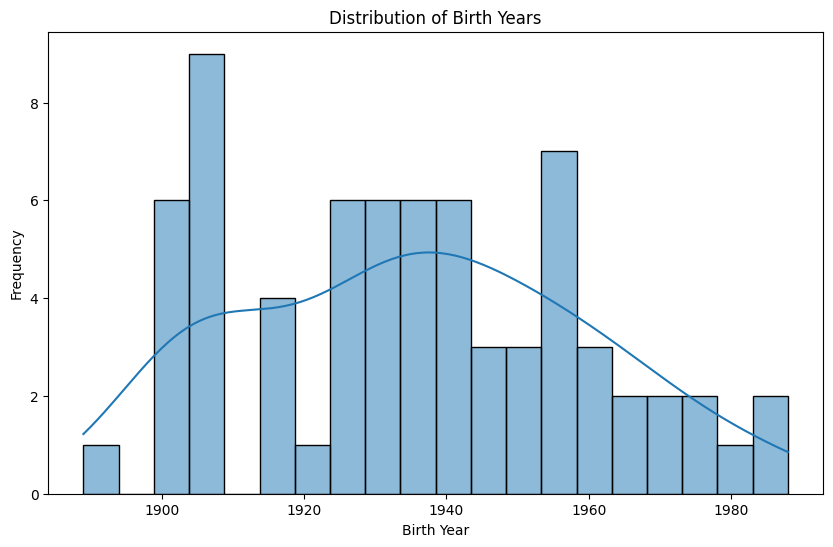

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(inner_join_final['Birth Year'], bins=20, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


Gender Distribution

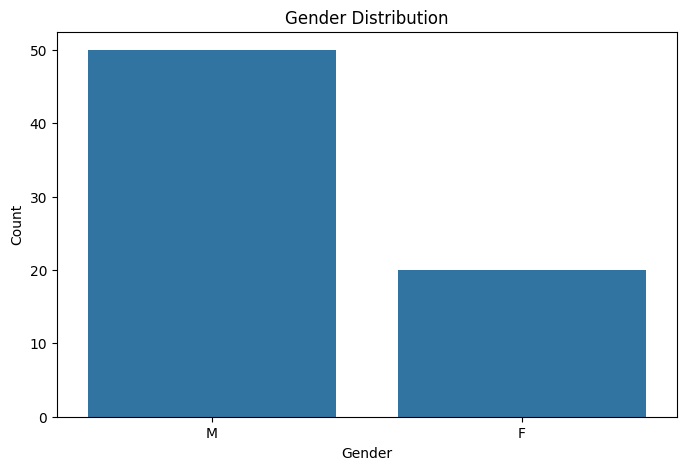

In [53]:
gender_counts = inner_join_final['Gender (traditional)'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Correlation Analysis:

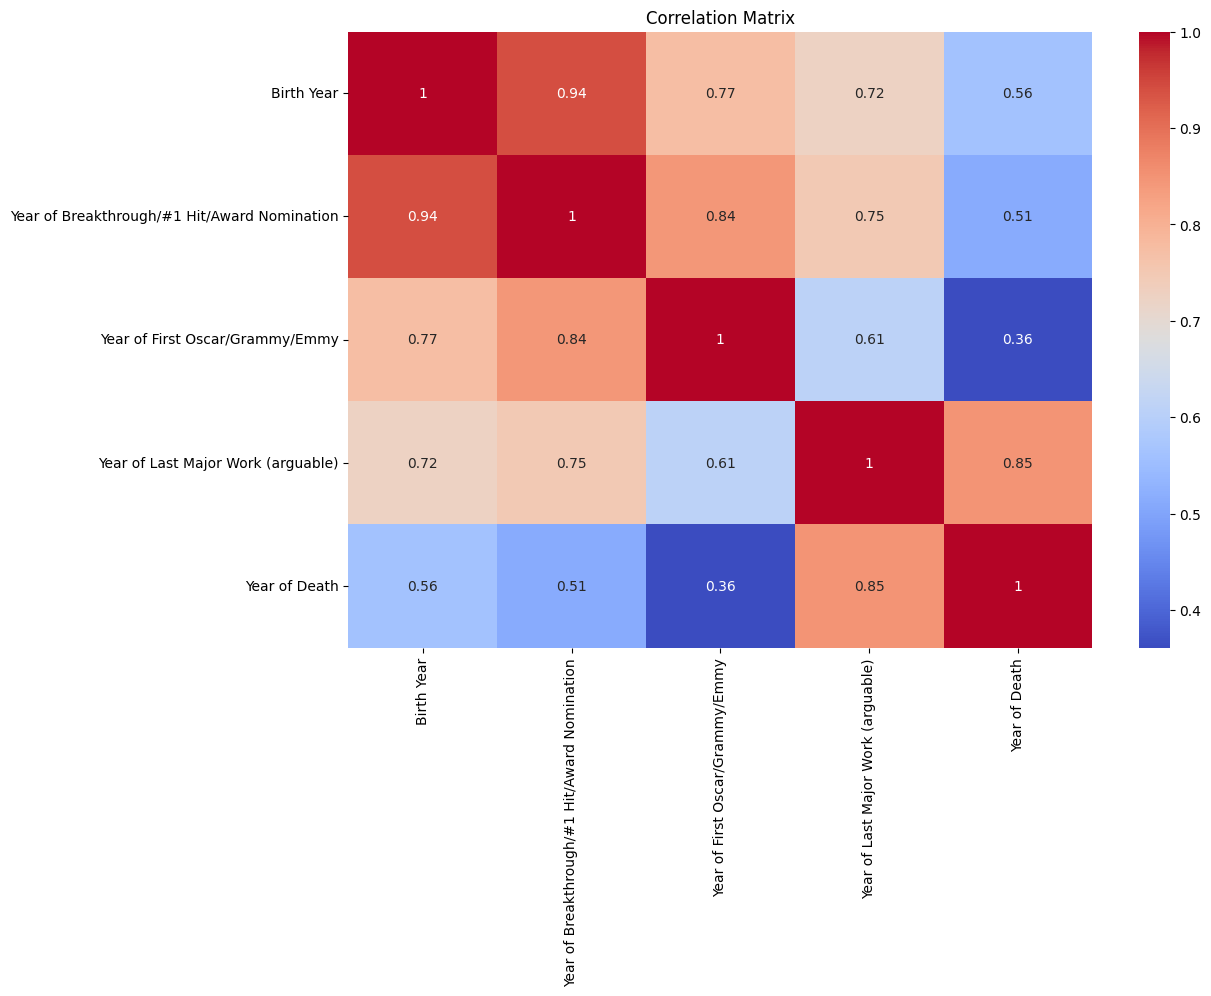

In [54]:
# Convert 'Unknown' values to NaN
inner_join_final_numeric = inner_join_final.replace('Unknown', np.nan)

# Select only numeric columns for correlation calculation
numeric_columns = inner_join_final_numeric.select_dtypes(include=np.number).columns
correlation_matrix = inner_join_final_numeric[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Age at Breakthrough:

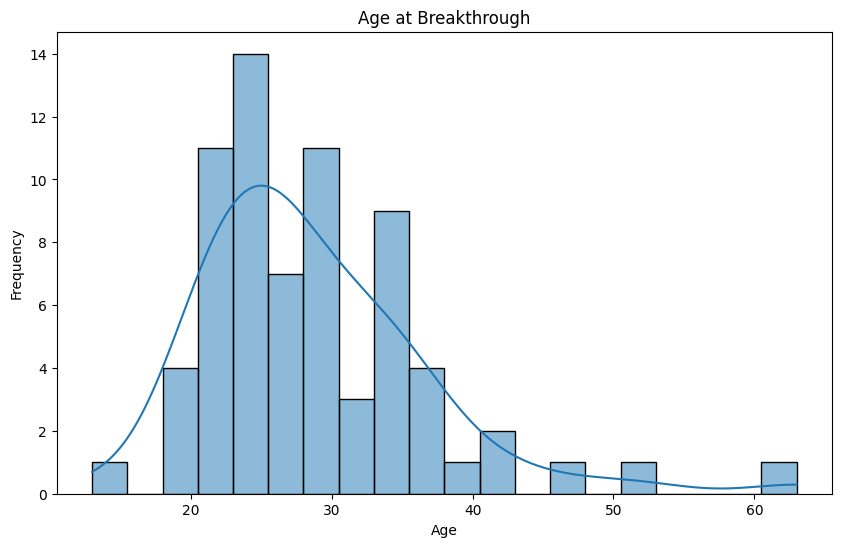

In [55]:
inner_join_final['Age at Breakthrough'] = inner_join_final['Year of Breakthrough/#1 Hit/Award Nomination'] - inner_join_final['Birth Year']
plt.figure(figsize=(10, 6))
sns.histplot(inner_join_final['Age at Breakthrough'], bins=20, kde=True)
plt.title('Age at Breakthrough')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Career Duration

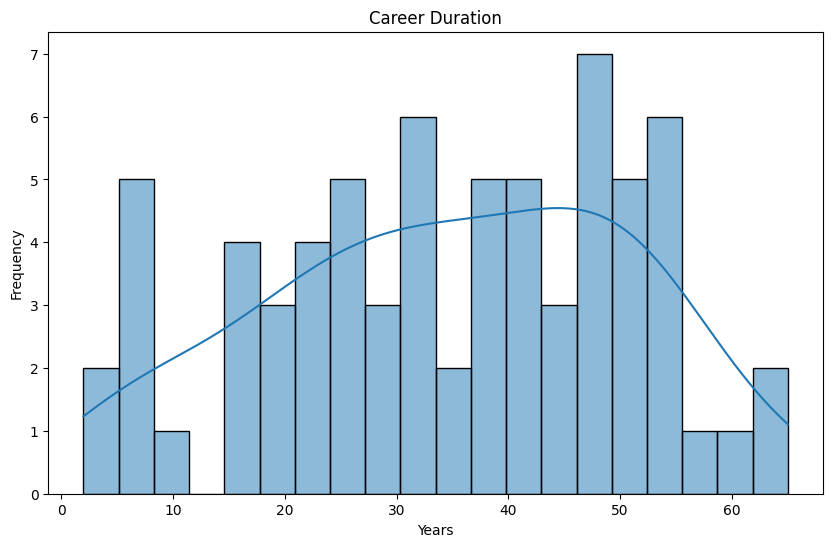

In [56]:
inner_join_final['Career Duration'] = inner_join_final['Year of Last Major Work (arguable)'] - inner_join_final['Year of Breakthrough/#1 Hit/Award Nomination']
plt.figure(figsize=(10, 6))
sns.histplot(inner_join_final['Career Duration'], bins=20, kde=True)
plt.title('Career Duration')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()


**Top 10 Entertainers by Career Duration:**

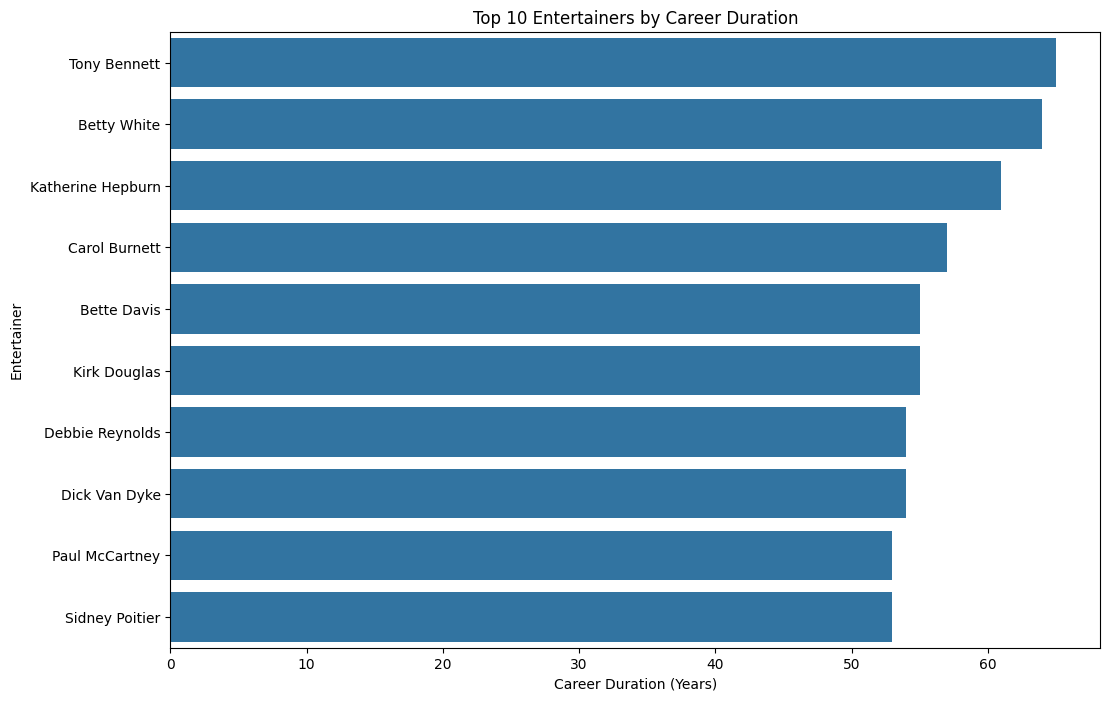

In [57]:
top_10_career_duration = inner_join_final.nlargest(10, 'Career Duration')
plt.figure(figsize=(12, 8))
sns.barplot(x='Career Duration', y='Entertainer', data=top_10_career_duration)
plt.title('Top 10 Entertainers by Career Duration')
plt.xlabel('Career Duration (Years)')
plt.ylabel('Entertainer')
plt.show()
